In [9]:
# Read csv Theft_from_Motor_Vehicle.csv

import pandas as pd

df = pd.read_csv('Theft_from_Motor_Vehicle.csv')
df.head()

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.835512e+06,5.418252e+06,1,GO-20141260616,D53,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mobile)",House,2142,...,1.0,1.0,Wednesday,2,NonMCI,56,Leaside-Bennington,-79.370758,43.694274,1
1,-8.844479e+06,5.422776e+06,2,GO-20149000010,D32,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,15,NonMCI,31,Yorkdale-Glen Park,-79.451310,43.723650,2
2,-8.836012e+06,5.410878e+06,3,GO-20141261694,D51,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)",Commercial,2142,...,1.0,1.0,Wednesday,1,NonMCI,77,Waterfront Communities-The Island,-79.375245,43.646361,3
3,-8.849244e+06,5.422821e+06,4,GO-20141262668,D31,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,18,NonMCI,26,Downsview-Roding-CFB,-79.494115,43.723947,4
4,-8.838679e+06,5.410277e+06,5,GO-20141261604,D14,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,16,NonMCI,77,Waterfront Communities-The Island,-79.399201,43.642458,5


In [10]:
# Convert reporteddate to datetime
df['reporteddate'] = pd.to_datetime(df['reporteddate'])

# Create a new column year month and day
df['year'] = df['reporteddate'].dt.year
df['month'] = df['reporteddate'].dt.month
df['day'] = df['reporteddate'].dt.day

<AxesSubplot: xlabel='year'>

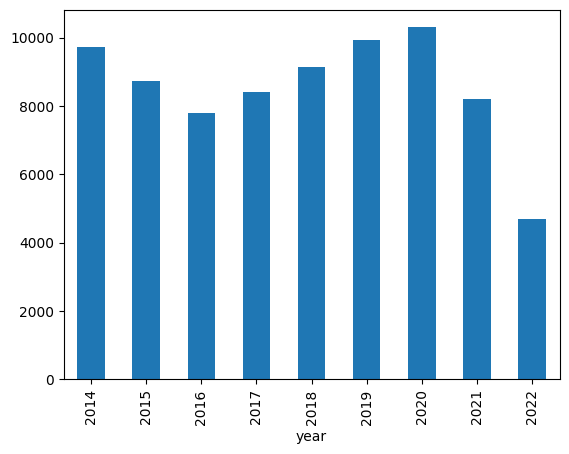

In [11]:
# Graph the number of thefts per year
df.groupby('year')['reporteddate'].count().plot(kind='bar')


<AxesSubplot: xlabel='month'>

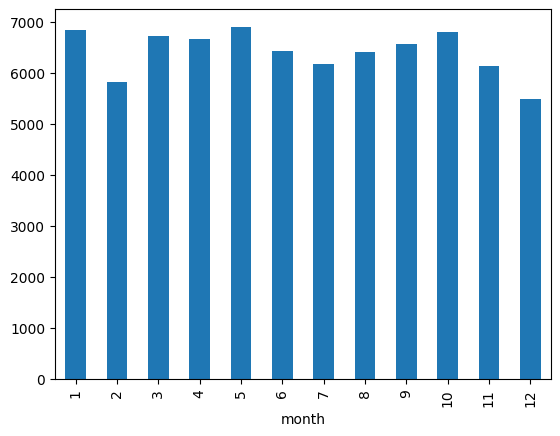

In [12]:
# Graph the number of thefts per month
df.groupby('month')['reporteddate'].count().plot(kind='bar')

<AxesSubplot: xlabel='year,month'>

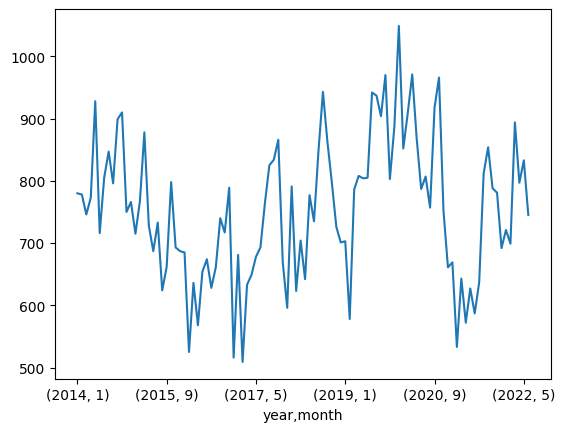

In [13]:
# Graph the number of thefts per month and year
df.groupby(['year', 'month'])['reporteddate'].count().plot(kind='line')

<AxesSubplot: xlabel='year,month'>

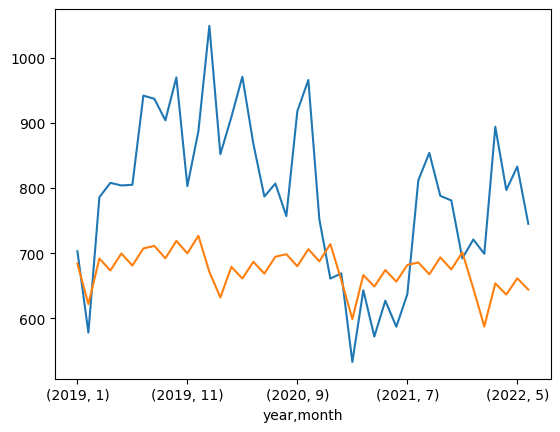

In [14]:

# Make a clone of the dataframe
df_ml = df.copy()

# Sum the number of thefts per day, month and year
df_ml = df_ml.groupby(['year', 'month', 'day'])['reporteddate'].count().reset_index()

# Rename the reporteddate column to thefts
df_ml.rename(columns={'reporteddate': 'thefts'}, inplace=True)

# Drop all columns except 'year' 'month' 'day' 'thefts'
df_ml = df_ml[['year', 'month', 'day', 'thefts']]

# Divide test and train data where test data is from 2019 to 2022 with loc
train_data = df_ml[df_ml['year'] < 2019]
test_data = df_ml[df_ml['year'] >= 2019]

# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data[['year', 'month', 'day']], train_data['thefts'])

# Predict the number of thefts
predictions = model.predict(test_data[['year', 'month', 'day']])

# Append the predictions to the test data use loc
test_data_graph = test_data.copy()
test_data_graph['predictions'] = predictions

# Plot the predicted thefts and actual thefts on the same graph by year and month
test_data_graph.groupby(['year', 'month'])['thefts'].sum().plot(kind='line')
test_data_graph.groupby(['year', 'month'])[
    'predictions'].sum().plot(kind='line')



In [35]:
# Calculate the model accuracy
from sklearn.metrics import mean_squared_error
mean_squared_error(test_data['thefts'], predictions)

67.29512007408962

In [27]:
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential

df_dl_1 = df.copy()

# Sum the number of thefts per day, month and year
df_dl_1 = df_dl_1.groupby(['year', 'month', 'day'])[
    'reporteddate'].count().reset_index()

# Rename the reporteddate column to thefts
df_dl_1.rename(columns={'reporteddate': 'thefts'}, inplace=True)

# Drop all columns except 'year' 'month' 'day' 'thefts'
df_dl_1 = df_dl_1[['year', 'month', 'day', 'thefts']]

# Divide test and train data where test data is from 2019 to 2022 with loc
train_data = df_dl_1[df_dl_1['year'] < 2019]
test_data = df_dl_1[df_dl_1['year'] >= 2019]

# Train a keras model with 1 input layer, 4 hidden layers and 1 output layer
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

# Train the model
model.fit(train_data[['year', 'month', 'day']], train_data['thefts'], epochs=1000)

Epoch 1/1000
58/58 [==============================] - 1s 1ms/step - loss: 260.5793
Epoch 2/1000
58/58 [==============================] - 0s 1ms/step - loss: 61.5151
Epoch 3/1000
58/58 [==============================] - 0s 1ms/step - loss: 56.1361
Epoch 4/1000
58/58 [==============================] - 0s 1ms/step - loss: 56.2047
Epoch 5/1000
58/58 [==============================] - 0s 1ms/step - loss: 56.6489
Epoch 6/1000
58/58 [==============================] - 0s 1ms/step - loss: 56.3948
Epoch 7/1000
58/58 [==============================] - 0s 1ms/step - loss: 57.0392
Epoch 8/1000
58/58 [==============================] - 0s 1ms/step - loss: 56.2423
Epoch 9/1000
58/58 [==============================] - 0s 1ms/step - loss: 56.2041
Epoch 10/1000
58/58 [==============================] - 0s 1ms/step - loss: 56.2207
Epoch 11/1000
58/58 [==============================] - 0s 1ms/step - loss: 56.1288
Epoch 12/1000
58/58 [==============================] - 0s 1ms/step - loss: 56.2779
Epoch 13/100

In [34]:
# Calculate the model accuracy
print(model.evaluate(test_data[['year', 'month', 'day']], test_data['thefts']))
print(model.evaluate(train_data[['year', 'month', 'day']], train_data['thefts']))

40/40 [==============================] - 0s 999us/step - loss: 67.2951
67.29511260986328
58/58 [==============================] - 0s 955us/step - loss: 55.9824
55.98240280151367


In [30]:
# Predict the number of thefts
predictions = model.predict(test_data[['year', 'month', 'day']])
predictions = predictions.reshape(-1)

# Predict the number of thefts in train data
predictions_train = model.predict(train_data[['year', 'month', 'day']])
predictions_train = predictions_train.reshape(-1)

# Append the predictions to the test and train data
test_data_graph = test_data.copy()
test_data_graph['predictions'] = predictions

train_data_graph = train_data.copy()
train_data_graph['predictions'] = predictions_train


58/58 [==============================] - 0s 1ms/step


<AxesSubplot: xlabel='year,month'>

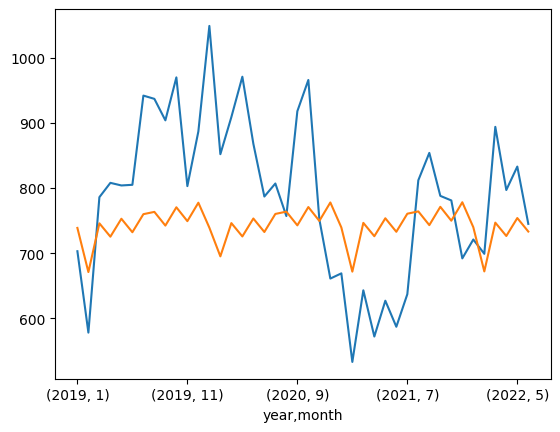

In [31]:
# Plot the predicted thefts and actual thefts on the same graph by year and month
test_data_graph.groupby(['year', 'month'])['thefts'].sum().plot(kind='line')
test_data_graph.groupby(['year', 'month'])[
    'predictions'].sum().plot(kind='line')


<AxesSubplot: xlabel='year,month'>

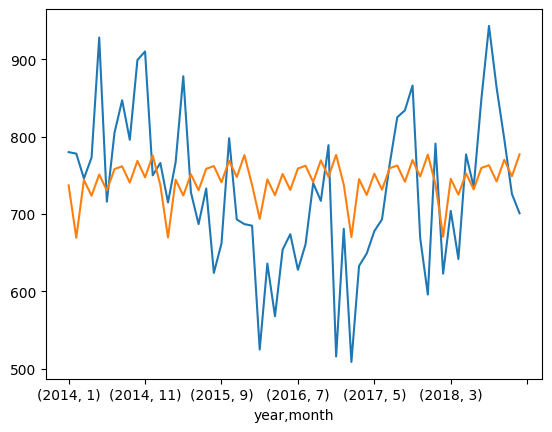

In [32]:
# Plot the predicted thefts and actual thefts on the same graph by year and month
train_data_graph.groupby(['year', 'month'])['thefts'].sum().plot(kind='line')
train_data_graph.groupby(['year', 'month'])[
    'predictions'].sum().plot(kind='line')
from fastai.tabular.all import *

In [ ]:

from fastai.tabular.all import *

df_dl_2 = df.copy()
